In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

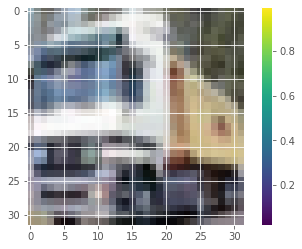

In [9]:
# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [4]:
# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 21s 18ms/step - loss: 1.5206 - accuracy: 0.4522 - val_loss: 1.2442 - val_accuracy: 0.5625
Epoch 2/10
1094/1094 [==============================] - 20s 18ms/step - loss: 1.1544 - accuracy: 0.5923 - val_loss: 1.1464 - val_accuracy: 0.5986
Epoch 3/10
1094/1094 [==============================] - 19s 17ms/step - loss: 1.0060 - accuracy: 0.6475 - val_loss: 1.0776 - val_accuracy: 0.6197
Epoch 4/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.9066 - accuracy: 0.6823 - val_loss: 1.0346 - val_accuracy: 0.6429
Epoch 5/10
1094/1094 [==============================] - 20s 18ms/step - loss: 0.8021 - accuracy: 0.7213 - val_loss: 1.0149 - val_accuracy: 0.6475
Epoch 6/10
1094/1094 [==============================] - 20s 18ms/step - loss: 0.7104 - accuracy: 0.7483 - val_loss: 1.0354 - val_accuracy: 0.6513
Epoch 7/10
1094/1094 [==============================] - 19s 17ms/step - loss: 0.6246 - accuracy: 0.7844 - val_loss: 1.0354 -

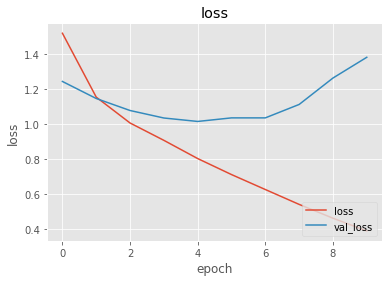

In [10]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

정답= [3]
예측값= [4.5837191e-05 5.7796692e-06 1.5895881e-04 7.1044153e-01 2.5968102e-03
 6.8761893e-02 1.4998287e-01 1.4670138e-06 6.8003707e-02 1.1286054e-06]


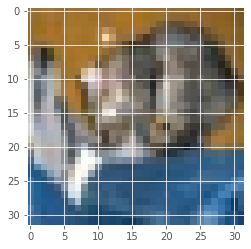

In [11]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])